[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/CV/blob/main/data-augmentation/GANs-ANN.ipynb)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import torchvision
from torchvision.utils import make_grid

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
LATENT_DIM = 64 # noisy input dimentions
IM_CHANNELS = 1 # no of channels in image = 1 cause black and white
IM_SIZE = (28, 28)

cpu


# Dataset

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Define the transformation to normalize the data between 1 and -1 (mean = 0.5 and variance = 0.5 will transform to values between 1 and -1)
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True) # downloading the MNIST train dataset and then applying some transformations
mnist_loader = DataLoader(dataset=mnist, batch_size=128, shuffle=True) # loading the downloaded dataset

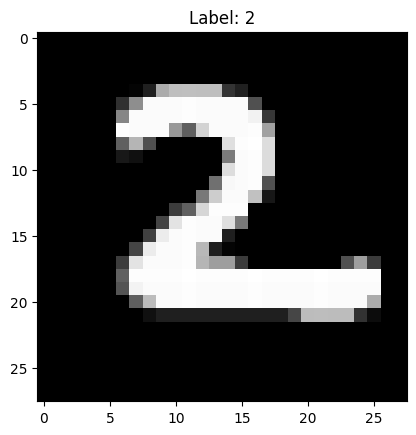

In [ ]:
# Display one image from one of the batches
images, labels = next(iter(mnist_loader)) # Extract one batch of images and labels
image = images[0].numpy().squeeze() # loading the one image from that batch
label = labels[0].item() # loading the actual label of the above image

import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.show()

# Modelling

In [ ]:
class Generator(nn.Module):

    def __init__(self):
        super().__init__()
        self.latent_dim = LATENT_DIM
        self.img_size = IM_SIZE
        self.channels = IM_CHANNELS

        # input layer units = 64, hidden layer 1 units = 128, hidden layer 2 units = 256, output layer units = 28*28*1 = 784
        input_layer = nn.Sequential(nn.Linear(self.latent_dim, 128),nn.BatchNorm1d(128),nn.LeakyReLU())
        hidden_layer_1 = nn.Sequential(nn.Linear(128, 256),nn.BatchNorm1d(256),nn.LeakyReLU())
        hidden_layer_2 = nn.Sequential(nn.Linear(256, 512),nn.BatchNorm1d(512),nn.LeakyReLU())
        output_layer = nn.Sequential(nn.Linear(512, self.img_size[0] * self.img_size[1] * self.channels),nn.Identity(),nn.Tanh()) #tanh because we transformed the org img between 1 and -1 and hence predicted image should also be between 1 and -1 and hence tanh
        self.layers = nn.ModuleList([input_layer, hidden_layer_1, hidden_layer_2, output_layer])

    def forward(self, z):
        batch_size = z.shape[0]
        out = z.reshape(-1, self.latent_dim)
        for layer in self.layers:
            out = layer(out)
        out = out.reshape(batch_size, self.channels, self.img_size[0], self.img_size[1])
        return out

In [ ]:
class Discriminator(nn.Module):

    def __init__(self):
        super().__init__()
        self.img_size = IM_SIZE
        self.channels = IM_CHANNELS

        input_layer = nn.Sequential(nn.Linear(self.img_size[0] * self.img_size[1] * self.channels, 512),nn.LayerNorm(512),nn.LeakyReLU())
        hidden_layer_1 = nn.Sequential(nn.Linear(512, 256),nn.LayerNorm(256),nn.LeakyReLU())
        hidden_layer_2 = nn.Sequential(nn.Linear(256, 128),nn.LayerNorm(128),nn.LeakyReLU())
        output_layer = nn.Sequential(nn.Linear(128, 1),nn.Identity(),nn.Sigmoid()) # Identity is used when you dont want any normalization
        self.layers = nn.ModuleList([input_layer, hidden_layer_1, hidden_layer_2, output_layer])

        # instead of layer norm here also you can use batch norm but layer norm gives better results

    def forward(self, x):
        # Flattening the image input
        out = x.reshape(-1, self.img_size[0] * self.img_size[1] * self.channels)
        for layer in self.layers:
            out = layer(out)
        return out

# Training

In [ ]:
from torch.optim import Adam

# Instantiate generator model
generator = Generator().to(device)
generator.train()
optimizer_generator = Adam(generator.parameters(), lr=1E-4, betas=(0.5, 0.999)) #0.5 is momentum

# Instantiate discriminator model
discriminator = Discriminator().to(device)
discriminator.train()
optimizer_discriminator = Adam(discriminator.parameters(), lr=1E-4, betas=(0.5, 0.999)) #0.5 is momentum

100%|██████████| 469/469 [00:50<00:00,  9.34it/s]


Finished epoch:1 | Generator Loss : 1.5865892484498176 | Discriminator Loss : 0.8646969252557897 | Discriminator real pred : 0.6655659468443409 | Discriminator fake pred : 0.5794179889439012


100%|██████████| 469/469 [00:44<00:00, 10.65it/s]


Finished epoch:2 | Generator Loss : 1.5834769998659204 | Discriminator Loss : 0.868142073850896 | Discriminator real pred : 0.6645157999321342 | Discriminator fake pred : 0.5759477527665177


100%|██████████| 469/469 [00:45<00:00, 10.31it/s]


Finished epoch:3 | Generator Loss : 1.7994702700485807 | Discriminator Loss : 0.7596259312207765 | Discriminator real pred : 0.673557223033295 | Discriminator fake pred : 0.5652000226699976


100%|██████████| 469/469 [00:44<00:00, 10.52it/s]


Finished epoch:4 | Generator Loss : 1.9597475048321396 | Discriminator Loss : 0.7113588966413348 | Discriminator real pred : 0.678511547127258 | Discriminator fake pred : 0.5591341492209607


100%|██████████| 469/469 [00:44<00:00, 10.44it/s]


Finished epoch:5 | Generator Loss : 1.9730971225543317 | Discriminator Loss : 0.7122724784462691 | Discriminator real pred : 0.6790997154677092 | Discriminator fake pred : 0.5576580442599396


100%|██████████| 469/469 [00:44<00:00, 10.63it/s]


Finished epoch:6 | Generator Loss : 1.896842175201058 | Discriminator Loss : 0.7516661046791687 | Discriminator real pred : 0.6766250976113114 | Discriminator fake pred : 0.5604227951594761


100%|██████████| 469/469 [00:45<00:00, 10.36it/s]


Finished epoch:7 | Generator Loss : 1.8675557454384721 | Discriminator Loss : 0.7760642576319322 | Discriminator real pred : 0.6753402361229285 | Discriminator fake pred : 0.5619456307974451


100%|██████████| 469/469 [00:44<00:00, 10.60it/s]


Finished epoch:8 | Generator Loss : 1.8369538453596232 | Discriminator Loss : 0.7822590897332377 | Discriminator real pred : 0.6747042362623886 | Discriminator fake pred : 0.5627105870226553


100%|██████████| 469/469 [00:44<00:00, 10.43it/s]


Finished epoch:9 | Generator Loss : 1.8032811723792477 | Discriminator Loss : 0.7947954010607591 | Discriminator real pred : 0.6737095362850344 | Discriminator fake pred : 0.5636064387333672


100%|██████████| 469/469 [00:44<00:00, 10.62it/s]


Finished epoch:10 | Generator Loss : 1.7677090821235673 | Discriminator Loss : 0.8109582015700432 | Discriminator real pred : 0.6728565767884 | Discriminator fake pred : 0.5649199254477202


100%|██████████| 469/469 [00:45<00:00, 10.41it/s]


Finished epoch:11 | Generator Loss : 1.6958719904997201 | Discriminator Loss : 0.8362591907159606 | Discriminator real pred : 0.6712364507382358 | Discriminator fake pred : 0.5672638476022017


100%|██████████| 469/469 [00:45<00:00, 10.37it/s]


Finished epoch:12 | Generator Loss : 1.6440044431162795 | Discriminator Loss : 0.8601098180071377 | Discriminator real pred : 0.6690352676011352 | Discriminator fake pred : 0.5694017636496375


100%|██████████| 469/469 [00:45<00:00, 10.27it/s]


Finished epoch:13 | Generator Loss : 1.6316265200755236 | Discriminator Loss : 0.8659613140102135 | Discriminator real pred : 0.6687291084067908 | Discriminator fake pred : 0.5700723356021239


100%|██████████| 469/469 [00:44<00:00, 10.51it/s]


Finished epoch:14 | Generator Loss : 1.6009416524281126 | Discriminator Loss : 0.8774544080691551 | Discriminator real pred : 0.6674661492742201 | Discriminator fake pred : 0.5710329708260006


100%|██████████| 469/469 [00:45<00:00, 10.22it/s]


Finished epoch:15 | Generator Loss : 1.5763510231778566 | Discriminator Loss : 0.8854966317412696 | Discriminator real pred : 0.666924039438081 | Discriminator fake pred : 0.5718876999070142


100%|██████████| 469/469 [00:44<00:00, 10.52it/s]


Finished epoch:16 | Generator Loss : 1.5512336089666972 | Discriminator Loss : 0.8970648277797171 | Discriminator real pred : 0.6659851353814099 | Discriminator fake pred : 0.5729334590785793


100%|██████████| 469/469 [00:45<00:00, 10.26it/s]


Finished epoch:17 | Generator Loss : 1.5321591295667294 | Discriminator Loss : 0.8970587610690071 | Discriminator real pred : 0.6657188529653082 | Discriminator fake pred : 0.5734060146152846


100%|██████████| 469/469 [00:44<00:00, 10.44it/s]


Finished epoch:18 | Generator Loss : 1.5351176324175364 | Discriminator Loss : 0.9071204324266804 | Discriminator real pred : 0.6652333103517479 | Discriminator fake pred : 0.5737326426038356


100%|██████████| 469/469 [00:45<00:00, 10.30it/s]


Finished epoch:19 | Generator Loss : 1.505824787784487 | Discriminator Loss : 0.9076881140534049 | Discriminator real pred : 0.6650496700933493 | Discriminator fake pred : 0.573998438905297


100%|██████████| 469/469 [00:44<00:00, 10.43it/s]


Finished epoch:20 | Generator Loss : 1.4978125718102526 | Discriminator Loss : 0.9185544342628674 | Discriminator real pred : 0.664146451045201 | Discriminator fake pred : 0.5751335310783467


100%|██████████| 469/469 [00:45<00:00, 10.35it/s]


Finished epoch:21 | Generator Loss : 1.4965381994684621 | Discriminator Loss : 0.9171861657964141 | Discriminator real pred : 0.6642603092610455 | Discriminator fake pred : 0.5753041477854064


100%|██████████| 469/469 [00:46<00:00, 10.17it/s]


Finished epoch:22 | Generator Loss : 1.4811927306372474 | Discriminator Loss : 0.9217970925353484 | Discriminator real pred : 0.6636048355844738 | Discriminator fake pred : 0.5756256469785531


100%|██████████| 469/469 [00:45<00:00, 10.28it/s]


Finished epoch:23 | Generator Loss : 1.484559585926121 | Discriminator Loss : 0.9220837640609822 | Discriminator real pred : 0.6638539114486434 | Discriminator fake pred : 0.5754943055384703


100%|██████████| 469/469 [00:46<00:00, 10.15it/s]


Finished epoch:24 | Generator Loss : 1.4829853923717287 | Discriminator Loss : 0.9237219798031138 | Discriminator real pred : 0.6635611688912805 | Discriminator fake pred : 0.575794921882117


100%|██████████| 469/469 [00:45<00:00, 10.41it/s]


Finished epoch:25 | Generator Loss : 1.4793337443744197 | Discriminator Loss : 0.9272606696909679 | Discriminator real pred : 0.6633889357418393 | Discriminator fake pred : 0.576111087031456


100%|██████████| 469/469 [00:46<00:00, 10.12it/s]


Finished epoch:26 | Generator Loss : 1.4548231726770462 | Discriminator Loss : 0.9335942564488474 | Discriminator real pred : 0.6627886224148879 | Discriminator fake pred : 0.576577996013007


100%|██████████| 469/469 [00:45<00:00, 10.30it/s]


Finished epoch:27 | Generator Loss : 1.4527853867138372 | Discriminator Loss : 0.9358979260235198 | Discriminator real pred : 0.6626743198966166 | Discriminator fake pred : 0.576927882394811


100%|██████████| 469/469 [00:46<00:00, 10.09it/s]


Finished epoch:28 | Generator Loss : 1.4568218618059463 | Discriminator Loss : 0.9348182521903439 | Discriminator real pred : 0.6626837562396328 | Discriminator fake pred : 0.5767177525105507


100%|██████████| 469/469 [00:46<00:00, 10.17it/s]


Finished epoch:29 | Generator Loss : 1.4597087259739956 | Discriminator Loss : 0.9315423567666173 | Discriminator real pred : 0.6629512593436089 | Discriminator fake pred : 0.5766254087755167


100%|██████████| 469/469 [00:45<00:00, 10.42it/s]


Finished epoch:30 | Generator Loss : 1.4399746038766303 | Discriminator Loss : 0.9367157882973075 | Discriminator real pred : 0.6624840148476395 | Discriminator fake pred : 0.5771278304331846


100%|██████████| 469/469 [00:45<00:00, 10.26it/s]


Finished epoch:31 | Generator Loss : 1.4532768220535472 | Discriminator Loss : 0.936329877198632 | Discriminator real pred : 0.6624459725961502 | Discriminator fake pred : 0.5770760869929022


100%|██████████| 469/469 [00:44<00:00, 10.48it/s]


Finished epoch:32 | Generator Loss : 1.449512627333212 | Discriminator Loss : 0.9336493751133429 | Discriminator real pred : 0.6625781872633424 | Discriminator fake pred : 0.5770425532164096


100%|██████████| 469/469 [00:45<00:00, 10.21it/s]


Finished epoch:33 | Generator Loss : 1.4599220281216636 | Discriminator Loss : 0.9342248648214442 | Discriminator real pred : 0.6626985037504737 | Discriminator fake pred : 0.5767013883031508


100%|██████████| 469/469 [00:46<00:00, 10.18it/s]


Finished epoch:34 | Generator Loss : 1.449831473929033 | Discriminator Loss : 0.937482588962197 | Discriminator real pred : 0.6623667866182226 | Discriminator fake pred : 0.577090136532082


100%|██████████| 469/469 [00:46<00:00, 10.19it/s]


Finished epoch:35 | Generator Loss : 1.44853452121271 | Discriminator Loss : 0.9361220604575264 | Discriminator real pred : 0.6623366978376913 | Discriminator fake pred : 0.5772112381737878


100%|██████████| 469/469 [00:44<00:00, 10.50it/s]


Finished epoch:36 | Generator Loss : 1.4521780367344936 | Discriminator Loss : 0.9309302680273809 | Discriminator real pred : 0.6626683993380207 | Discriminator fake pred : 0.5769012224699642


100%|██████████| 469/469 [00:45<00:00, 10.33it/s]


Finished epoch:37 | Generator Loss : 1.4484759156129507 | Discriminator Loss : 0.9355192399228306 | Discriminator real pred : 0.6625353296174169 | Discriminator fake pred : 0.5770482014237183


100%|██████████| 469/469 [00:44<00:00, 10.44it/s]


Finished epoch:38 | Generator Loss : 1.4513914454212067 | Discriminator Loss : 0.9329510101123151 | Discriminator real pred : 0.66263544534061 | Discriminator fake pred : 0.5769771305736957


100%|██████████| 469/469 [00:45<00:00, 10.33it/s]


Finished epoch:39 | Generator Loss : 1.4454034594838807 | Discriminator Loss : 0.9350086585290904 | Discriminator real pred : 0.6623672952275794 | Discriminator fake pred : 0.5771237428762765


100%|██████████| 469/469 [00:45<00:00, 10.28it/s]


Finished epoch:40 | Generator Loss : 1.4457676023054225 | Discriminator Loss : 0.9397622949278939 | Discriminator real pred : 0.6621523026718514 | Discriminator fake pred : 0.5774001387644933


100%|██████████| 469/469 [00:44<00:00, 10.46it/s]


Finished epoch:41 | Generator Loss : 1.4388235705747787 | Discriminator Loss : 0.9370635458147094 | Discriminator real pred : 0.6623806443804109 | Discriminator fake pred : 0.5773345845848766


100%|██████████| 469/469 [00:45<00:00, 10.31it/s]


Finished epoch:42 | Generator Loss : 1.4480473949456774 | Discriminator Loss : 0.9394672768456596 | Discriminator real pred : 0.6622151642211719 | Discriminator fake pred : 0.5774144606549603


100%|██████████| 469/469 [00:45<00:00, 10.34it/s]


Finished epoch:43 | Generator Loss : 1.450698878210999 | Discriminator Loss : 0.9376531905456901 | Discriminator real pred : 0.6622328201590825 | Discriminator fake pred : 0.577256363083813


100%|██████████| 469/469 [00:45<00:00, 10.21it/s]


Finished epoch:44 | Generator Loss : 1.4495066132372632 | Discriminator Loss : 0.9302791423126578 | Discriminator real pred : 0.662726503191218 | Discriminator fake pred : 0.5769033269333178


100%|██████████| 469/469 [00:44<00:00, 10.44it/s]


Finished epoch:45 | Generator Loss : 1.4606620188969284 | Discriminator Loss : 0.9338098660206744 | Discriminator real pred : 0.6626104207943752 | Discriminator fake pred : 0.5769303438505893


100%|██████████| 469/469 [00:45<00:00, 10.24it/s]


Finished epoch:46 | Generator Loss : 1.465315537666207 | Discriminator Loss : 0.9252683516504414 | Discriminator real pred : 0.6631390870507083 | Discriminator fake pred : 0.5764593119814452


100%|██████████| 469/469 [00:45<00:00, 10.40it/s]


Finished epoch:47 | Generator Loss : 1.466026076757069 | Discriminator Loss : 0.9242542569062857 | Discriminator real pred : 0.6631552677418886 | Discriminator fake pred : 0.5761767239458779


100%|██████████| 469/469 [00:45<00:00, 10.24it/s]


Finished epoch:48 | Generator Loss : 1.4662799049796327 | Discriminator Loss : 0.927908861687951 | Discriminator real pred : 0.6630773238027527 | Discriminator fake pred : 0.5764209016808061


100%|██████████| 469/469 [00:45<00:00, 10.29it/s]


Finished epoch:49 | Generator Loss : 1.4675875865320154 | Discriminator Loss : 0.924378713056731 | Discriminator real pred : 0.6632348356216446 | Discriminator fake pred : 0.5764044843502899


100%|██████████| 469/469 [00:46<00:00, 10.16it/s]


Finished epoch:50 | Generator Loss : 1.478977004220999 | Discriminator Loss : 0.9251252232329932 | Discriminator real pred : 0.6632713567473487 | Discriminator fake pred : 0.5763390401024808


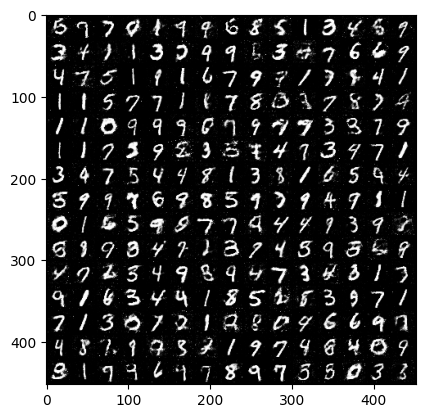

In [ ]:
steps = 0
for epoch in range(50): # for each epoch
    generator_losses = []
    discriminator_losses = []
    mean_real_dis_preds = []
    mean_fake_dis_preds = []

    for im, _ in tqdm(mnist_loader): # for each image in each epoch

        real_ims = im.float().to(device)
        batch_size = real_ims.shape[0]

        ''' ######################### First Optimizing the Discriminator ######################### '''

        optimizer_discriminator.zero_grad()

        fake_im_noise = torch.randn((batch_size, LATENT_DIM), device=device) # creating a noisy data
        fake_ims = generator(fake_im_noise) # passing the noisy data through the generator to get fake image
        disc_real_pred = discriminator(real_ims) # passing real image to the discriminator
        disc_fake_pred = discriminator(fake_ims.detach()) # passing fake image to the discriminator but we are detaching it so that gradients are not computed for generator and generator is not trained while training the discriminator

        disc_loss = -torch.mean(torch.log(disc_real_pred.reshape(-1) + 0.0001) + torch.log(1. - disc_fake_pred.reshape(-1) + 0.0001) )

        disc_loss.backward()
        optimizer_discriminator.step()

        mean_real_dis_preds.append(torch.nn.Sigmoid()(disc_real_pred).mean().item())
        mean_fake_dis_preds.append(torch.nn.Sigmoid()(disc_fake_pred).mean().item())


        ''' ######################### Second Optimizing the Generator ######################### '''
        optimizer_generator.zero_grad()

        fake_im_noise = torch.randn((batch_size, LATENT_DIM), device=device) # creating a noisy data
        fake_ims = generator(fake_im_noise) # passing through generator to create fake image
        disc_fake_pred = discriminator(fake_ims) # passing through discriminator to classify it as fake or real

        gen_fake_loss = -torch.mean(torch.log(disc_fake_pred.reshape(-1) + 0.0001))

        gen_fake_loss.backward()
        optimizer_generator.step()

        generator_losses.append(gen_fake_loss.item())
        discriminator_losses.append(disc_loss.item())

        ''' ######################### Seeing how the generator is improving with training ######################### '''
        if steps % 5 == 0:
            with torch.no_grad():
                generator.eval()

                NUM_SAMPLES = 225
                fake_im_noise = torch.randn((NUM_SAMPLES, LATENT_DIM), device=device) # generating some noisy data
                fake_ims = generator(fake_im_noise) # generating image using generator
                ims = torch.clamp(fake_ims, -1., 1.).detach().cpu() # clamping the generated images
                ims = 0.5*ims + 0.5 #detransforming the images from [-1,1] to [0,1]
                grid = make_grid(ims, nrow=15)
                img = torchvision.transforms.ToPILImage()(grid)
                plt.imshow(img, cmap='gray') # now display the image here using matplot lib

                generator.train()
        steps += 1

    print(f'''Finished epoch:{epoch + 1} | Generator Loss : {np.mean(generator_losses)} | Discriminator Loss : {np.mean(discriminator_losses)} | Discriminator real pred : {np.mean(mean_real_dis_preds)} | Discriminator fake pred : {np.mean(mean_fake_dis_preds)}''')

Key things to note in above training errors :
1. First discriminator loss decreases while generator loss increases => because initially only discriminator is being trained
2. Then the discriminator loss remains constant and the generator loss decreases => because now the discriminator is freezed and the generator is being trained

# Inference

In [ ]:
NUM_SAMPLES = 225
fake_im_noise = torch.randn((NUM_SAMPLES, LATENT_DIM), device=device) # generating some noisy data
generated_ims = generator(fake_im_noise) # generating image using generator

In [ ]:
generated_ims = torch.clamp(generated_ims, -1., 1.).detach().cpu() # clamping the generated images
generated_ims = 0.5*generated_ims + 0.5 #detransforming the images from [-1,1] to [0,1]

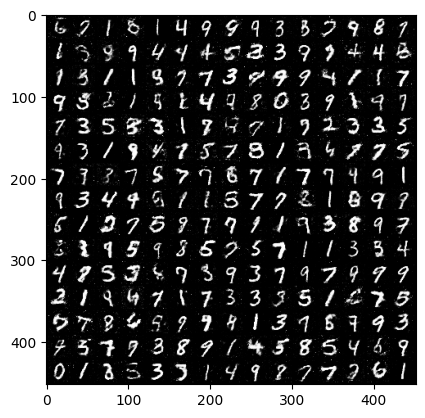

In [ ]:
# now printing the predicted images
grid = torchvision.utils.make_grid(generated_ims, nrow=15)
img = torchvision.transforms.ToPILImage()(grid)
plt.imshow(img, cmap='gray') # now display the image here using matplot lib